In [2]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import re

In [31]:
def parseOutput(filename):
    
    outputs = []
    
    with open(filename,'r') as f:
        for line in f:
            if line.startswith('Epoch'):
                output = {}
                output['epoch'] = int(re.findall('Epoch (\d*)',line)[0])
                output['train loss'] = float(re.findall('Train Batch Loss: ([\d\.]*)',line)[0])
                
                test_loss = re.findall('Test Loss: ([\d\.]*)',line)
                
                if test_loss:
                    output['test loss'] = float(test_loss[0])
                outputs += [output]
    outputs = pd.DataFrame(outputs)
    return outputs

In [92]:
foo = parseOutput('single_layertrain_and_test-2423303.out')

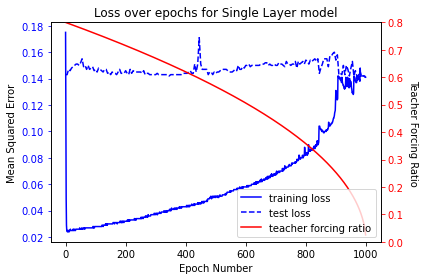

In [106]:
fig,ax = plt.subplots()

h1 = ax.plot(foo['epoch'],foo['train loss'],'b-',label='training loss')
h2 = ax.plot(foo.dropna()['epoch'],foo.dropna()['test loss'],'b--',label='test loss')

tax = ax.twinx()
h3 = tax.plot(foo['epoch'],0.8 * np.sqrt(1-foo['epoch']/1000),color='r',label='teacher forcing ratio')
tax.set_ylim((0,0.8))

handles = h1+h2+h3
labels = [h.get_label() for h in handles]
tax.legend(handles, labels,loc='lower right')

ax.tick_params(axis='y', colors='b')
tax.tick_params(axis='y', colors='r')

ax.set_ylabel('Mean Squared Error')
tax.set_ylabel('Teacher Forcing Ratio',rotation=-90,va='bottom')

ax.set_xlabel('Epoch Number')

ax.set_title('Loss over epochs for Single Layer model')

plt.tight_layout()
plt.savefig('figs/single_layer.png',dpi=300,facecolor='white')
plt.show()

In [56]:
bar = parseOutput('double_layer_train_and_test-2423304.out')

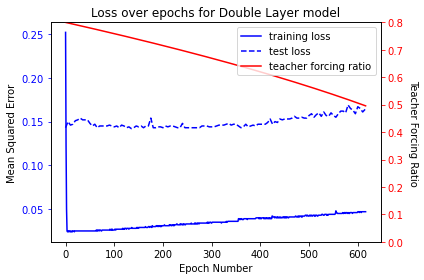

In [107]:
fig,ax = plt.subplots()

h1 = ax.plot(bar['epoch'],bar['train loss'],'b',label='training loss')
h2 = ax.plot(bar.dropna()['epoch'],bar.dropna()['test loss'],'b--',label='test loss')

tax = ax.twinx()
h3 = tax.plot(bar['epoch'],0.8 * np.sqrt(1-bar['epoch']/1000),color='r',label='teacher forcing ratio')
tax.set_ylim((0,0.8))

handles = h1+h2+h3
labels = [h.get_label() for h in handles]
tax.legend(handles, labels,loc='upper right')

ax.tick_params(axis='y', colors='b')
tax.tick_params(axis='y', colors='r')

ax.set_ylabel('Mean Squared Error')
tax.set_ylabel('Teacher Forcing Ratio',rotation=-90,va='bottom')

ax.set_xlabel('Epoch Number')

ax.set_title('Loss over epochs for Double Layer model')

plt.tight_layout()
plt.savefig('figs/double_layer.png',dpi=300,facecolor='white')
plt.show()

In [63]:
pred_Y = torch.load('single_layer_predicted_Y.pt',map_location=torch.device('cpu'))

In [76]:
pred_Y = pred_Y.squeeze(-1).unbind(1)

In [74]:
test_Y = torch.load('../code/all_Y.pt')[:,1024*97:,:]

In [77]:
test_Y = test_Y.squeeze(-1).unbind(1)

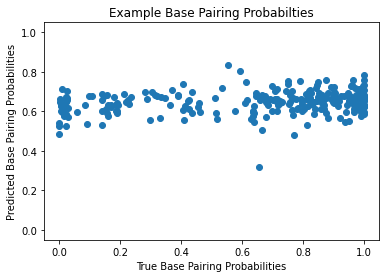

In [108]:
fig,ax = plt.subplots()

ax.scatter(test_Y[0][:test_Y[0].nonzero()[-1]],
        pred_Y[0][:test_Y[0].nonzero()[-1]])

ax.set_xlabel('True Base Pairing Probabilities')
ax.set_ylabel('Predicted Base Pairing Probabilities')

ax.set_ylim((-0.05,1.05))
ax.set_xlim((-0.05,1.05))

ax.set_title('Example Base Pairing Probabilties')
plt.savefig('figs/bpp.png',dpi=300,facecolor='white')

plt.show()

In [110]:
test_X = torch.load('../code/all_X.pt')[:,1024*97:,:]

In [123]:
test_X = test_X.squeeze(-1).unbind(1)

In [164]:
''.join(['AUGC'[torch.where(x==1)[0].item()] for x in test_X[0][:1+test_X[0].nonzero()[-1][0]]])

'UAGCUCUCGUGUCCGGCGAGAACUGAGGAGCGCCUCAUUUCACCAUGCCGCUGCGCCCAACGGGGCGGGCGCGGCGGGCACCUGCCCGCGGAUGGGCAUGGCAAGAUUGUCCAACGGACGUUGACCGGCAACUCUGGUGGUCCGACUCGCCGACCUGGAUCUUAGCACCGAGACAUGCAGCCACAUUGUGGCUGUCUCCGAAGAUAUAUUCUCCCUACCGGGUAGAGGAAAUGCAGUAGGUAAAUGGGCACCUGUGCUUUAUGGGCU'

In [143]:
np.round(test_Y[0][:test_X[0].nonzero()[-1][0]],3)

tensor([0.6560, 0.6670, 0.6780, 0.7190, 0.7230, 0.8520, 0.4090, 0.5150, 0.7670,
        0.8120, 0.8350, 0.7710, 0.0910, 0.3320, 0.5330, 0.5520, 0.5930, 0.9660,
        0.9530, 0.7940, 0.7140, 0.9520, 0.5780, 0.9800, 0.9570, 0.9010, 0.8990,
        0.8930, 0.0050, 0.0090, 0.0010, 0.0980, 0.9870, 0.9890, 0.9890, 0.8530,
        0.9190, 0.6360, 0.5170, 0.2960, 0.4060, 0.2280, 0.7190, 0.6080, 0.8390,
        0.8580, 0.8180, 0.1790, 0.8260, 0.9620, 0.9570, 0.9490, 0.5110, 0.4270,
        0.8660, 0.9600, 0.9100, 0.6760, 0.0580, 0.0230, 0.1390, 0.1610, 0.7580,
        0.8220, 0.8510, 0.7920, 0.8750, 0.8460, 0.8410, 0.9030, 0.7430, 0.3050,
        0.9010, 0.6150, 0.8750, 0.8570, 0.8370, 0.9620, 0.9090, 0.4370, 0.4260,
        0.4230, 0.4140, 0.9050, 0.9700, 0.7500, 0.7520, 0.6130, 0.4050, 0.7000,
        0.4370, 0.1380, 0.0130, 0.1520, 0.2180, 0.1450, 0.2810, 0.9730, 0.9900,
        0.9510, 0.8220, 0.9260, 0.8650, 0.1880, 0.1900, 0.1900, 0.1850, 0.6970,
        0.7680, 0.9930, 0.9980, 0.9830, 

In [141]:
pred_Y[0][:test_X[0].nonzero()[-1][0]]

tensor([0.3189, 0.5052, 0.5734, 0.6338, 0.6434, 0.6593, 0.5550, 0.5907, 0.5806,
        0.5311, 0.5842, 0.4819, 0.5347, 0.5665, 0.7181, 0.8341, 0.8044, 0.7559,
        0.6785, 0.6613, 0.6006, 0.5513, 0.6037, 0.6098, 0.6697, 0.6417, 0.6549,
        0.6600, 0.6033, 0.6305, 0.6624, 0.6766, 0.6896, 0.7113, 0.6627, 0.6942,
        0.6510, 0.6009, 0.5602, 0.5541, 0.6090, 0.6383, 0.6459, 0.6407, 0.6132,
        0.6105, 0.6274, 0.6734, 0.6947, 0.7352, 0.7281, 0.6768, 0.6677, 0.6552,
        0.6657, 0.6604, 0.6651, 0.6676, 0.5983, 0.5245, 0.5299, 0.5785, 0.6461,
        0.7067, 0.7465, 0.7518, 0.7578, 0.7321, 0.7190, 0.7229, 0.7017, 0.6972,
        0.6825, 0.6563, 0.6664, 0.6637, 0.6480, 0.6448, 0.6633, 0.5926, 0.6128,
        0.6515, 0.6258, 0.6950, 0.7176, 0.7398, 0.7521, 0.7473, 0.7401, 0.7282,
        0.6986, 0.6569, 0.6093, 0.6112, 0.6458, 0.6787, 0.6985, 0.6678, 0.6343,
        0.6508, 0.6662, 0.6756, 0.6423, 0.5912, 0.6417, 0.6000, 0.6033, 0.6031,
        0.6652, 0.6595, 0.7041, 0.7153, 